In [25]:
import numpy as np

Let's define some normal planes:

In [31]:
import numpy as np


def generate_orthogonal_vectors():
    # Generate a random vector (v1)
    v1 = np.random.rand(3)
    v1 = v1 / np.linalg.norm(v1)  # Normalize the vector

    # Generate a second vector (v2) that is not parallel to v1
    v2 = np.random.rand(3)
    while np.allclose(v2, v1) or np.allclose(v2, -v1):
        v2 = np.random.rand(3)

    # Use the cross product to generate a vector orthogonal to v1
    v2 = np.cross(v1, v2)
    v2 = v2 / np.linalg.norm(v2)  # Normalize the vector

    return v1, v2


# Let's generate and print the orthogonal vectors
v1, v2 = generate_orthogonal_vectors()

In [32]:
v1, v2

(array([0.35179915, 0.19914156, 0.91464747]),
 array([-0.91302807,  0.28848776,  0.28836531]))

In [34]:
assert np.dot(v1, v2) < 1e-10  # The dot product should be 0

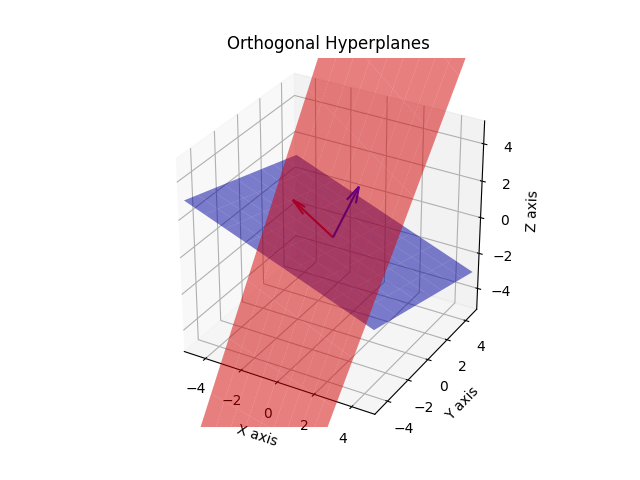

In [40]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range for x, y
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)

# Create meshgrid
X, Y = np.meshgrid(x, y)

# Define the hyperplanes
Z1 = -X - Y  # Plane 1: x + y + z = 0
Z2 = -X + Y  # Plane 2: x - y + z = 0

Z1 = (v1[0] * X + v1[1] * Y) / (-v1[2])
Z2 = (v2[0] * X + v2[1] * Y) / (-v2[2])

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_aspect("equal")

# Plot the hyperplanes
ax.plot_surface(X, Y, Z1, color="blue", alpha=0.5)
ax.plot_surface(X, Y, Z2, color="red", alpha=0.5)

# Adding arrows for the normal vectors
ax.quiver(0, 0, 0, *v1, length=3, color="blue")
ax.quiver(0, 0, 0, *v2, length=3, color="red")

# Setting plot limits
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])

# Labels
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
_ = ax.set_zlabel("Z axis")

_ = ax.set_title("Orthogonal Hyperplanes")